In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
ins_data=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\Shiva\\insurance.csv')

In [3]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ins_data.shape

(1338, 7)

In [8]:
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

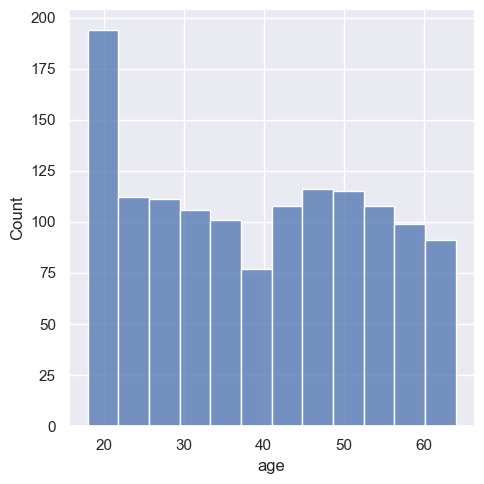

In [13]:
#Data Distribution for Numerical Column-Age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_data['age'])
plt.show()

In [14]:
ins_data['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

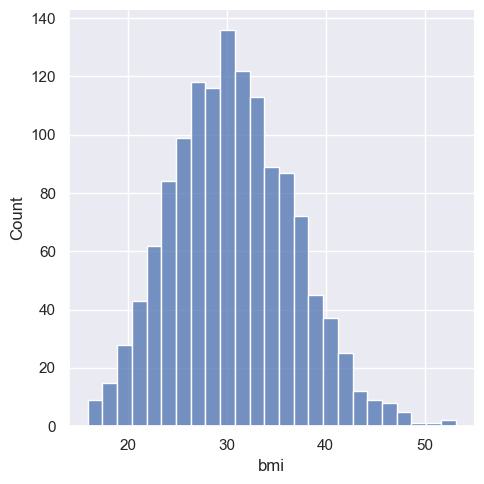

In [15]:
#Data Distribution for Numerical Column-BMI
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_data['bmi'])
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

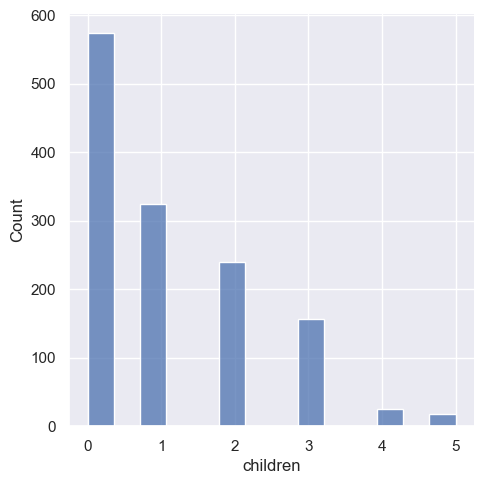

In [16]:
#Data Distribution for Numerical Column-Children
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_data['children'])
plt.show()

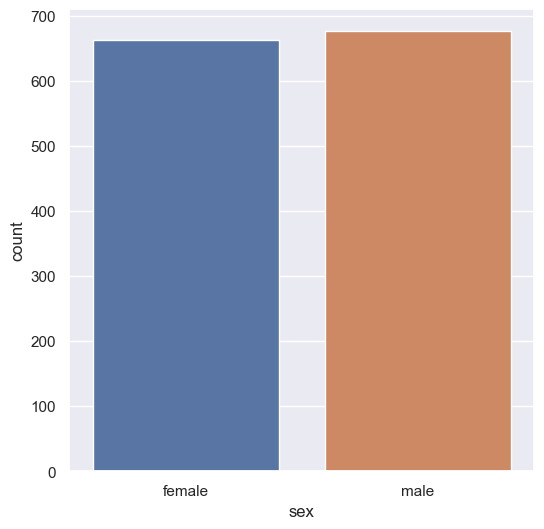

In [17]:
#Column Charts for Categorical Column-Sex
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=ins_data['sex'],data=ins_data)
plt.show()

In [18]:
ins_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

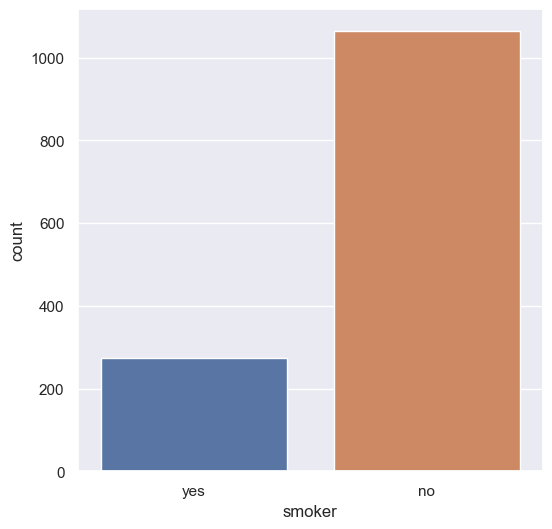

In [20]:
#Column Charts for Categorical Column-Smoker
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=ins_data['smoker'],data=ins_data)
plt.show()

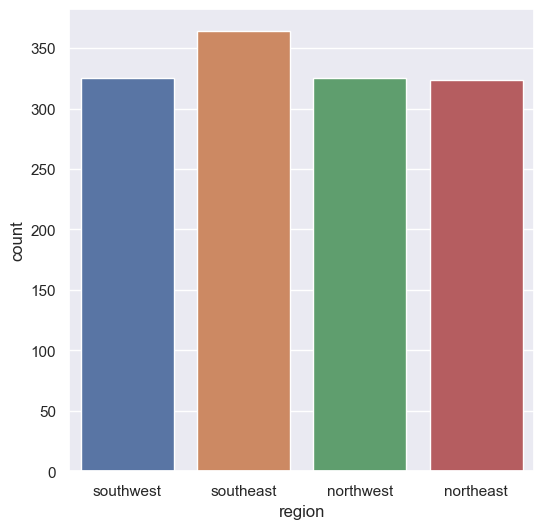

In [21]:
#Column Charts for Categorical Column-Region
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=ins_data['region'],data=ins_data)
plt.show()

In [22]:
ins_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [23]:
#Converting Catergorical Columns into Numerical Columns
ins_data.replace({'sex':{'female':0,'male':1}},inplace=True)
ins_data.replace({'smoker':{'no':0,'yes':1}},inplace=True)
ins_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [24]:
ins_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [25]:
input_data=ins_data.drop(columns='charges')
output_data=ins_data['charges']

In [26]:
input_data

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [27]:
output_data

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
input_train_data,input_test_data,output_train_data,output_test_data=train_test_split(input_data,output_data,test_size=0.2)

In [29]:
print(input_data.shape,input_train_data.shape,input_test_data.shape)

(1338, 6) (1070, 6) (268, 6)


In [30]:
print(output_data.shape,output_train_data.shape,output_test_data.shape)

(1338,) (1070,) (268,)


In [31]:
#Creation of Model
model=RandomForestRegressor(n_estimators=100,max_depth=7)

In [32]:
#Training the Model
model.fit(input_train_data,output_train_data)

RandomForestRegressor(max_depth=7)

In [33]:
#Predicting with Test dataset
test_data_predictions=model.predict(input_test_data)

In [34]:
#Evalution of Model
from sklearn.metrics import r2_score

In [35]:
r2_score(test_data_predictions,output_test_data)

0.8360174564768338

In [37]:
#Predicting with New Data
#age sex bmi children smoker region
New_input_data=(23,1,35,2,1,0)
input_data_array=np.asarray(New_input_data)
input_data_array=input_data_array.reshape(1,-1)

In [38]:
insurance_premium=model.predict(input_data_array)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [40]:
insurance_premium[0]


36116.33654673076

In [41]:
import pickle as pkl


In [42]:
pkl.dump(model,open('MIPML.pkl','wb'))